## Observations and Insights 

In [244]:
# Dependencies and Setup
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import sklearn.datasets as dta
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [245]:
#merge tables
all_mouse_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")
all_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [246]:
# Checking the number of rows
len(all_mouse_df["Mouse ID"])

1893

In [247]:

# Optional: Get all the data for the duplicate mouse ID. 
m_ids = all_mouse_df["Mouse ID"]
dup_id_df = all_mouse_df.duplicated(subset=["Mouse ID","Timepoint"])
dup_list = all_mouse_df[m_ids.isin(m_ids[dup_id_df])]
dup_list



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [248]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_list["Mouse ID"].unique()

array(['g989'], dtype=object)

In [249]:
# drop the duplicate id rows
#no_dups_mouse_df = all_mouse_df.drop_duplicates(subset=["Mouse ID","Timepoint"],keep=False)
droplist = dup_list["Mouse ID"].unique()
no_dups_mouse_df = all_mouse_df[all_mouse_df["Mouse ID"].isin(droplist) == False]



In [250]:
no_dups_mouse_df["Mouse ID"].nunique()

248

In [251]:
len(no_dups_mouse_df["Mouse ID"])

1880

## Summary Statistics

In [252]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_df = no_dups_mouse_df.groupby("Drug Regimen")
tumor_volume = drug_df["Tumor Volume (mm3)"]
tumor_volume.count()


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

In [253]:
tumor_volume.sem()
mean_tv = tumor_volume.mean()
median_tv = tumor_volume.median()
mode_tv = tumor_volume.agg(pd.Series.mode)
std_tv = tumor_volume.std()
variance_tv = tumor_volume.var()
sem_tv = tumor_volume.sem()

summary_tv_df = pd.DataFrame({
    "mean" : mean_tv,
    "median": median_tv,
    "mode" : mode_tv,
    "variance" : variance_tv,
    "std" : std_tv,
    "SEM" : sem_tv
})
summary_tv_df

,mean,median,mode,variance,std,SEM
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,45.0,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,45.0,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,45.0,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,45.0,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,45.0,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,45.0,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,45.0,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,45.0,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,45.0,59.450562,7.710419,0.573111


In [254]:
# Using the aggregation method, produce the same summary statistics in a single line

tv_df = no_dups_mouse_df[["Drug Regimen", "Tumor Volume (mm3)"]]
tv_df.groupby("Drug Regimen").agg([np.mean, np.median, pd.Series.mode, np.var, np.std, st.sem])

Tumor Volume (mm3)                                        \
                           mean     median  mode        var       std   
Drug Regimen                                                            
Capomulin             40.675741  41.557809  45.0  24.947764  4.994774   
Ceftamin              52.591172  51.776157  45.0  39.290177  6.268188   
Infubinol             52.884795  51.820584  45.0  43.128684  6.567243   
Ketapril              55.235638  53.698743  45.0  68.553577  8.279709   
Naftisol              54.331565  52.509285  45.0  66.173479  8.134708   
Placebo               54.033581  52.288934  45.0  61.168083  7.821003   
Propriva              52.320930  50.446266  45.0  43.852013  6.622085   
Ramicane              40.216745  40.673236  45.0  23.486704  4.846308   
Stelasyn              54.233149  52.431737  45.0  59.450562  7.710419   
Zoniferol             53.236507  51.818479  45.0  48.533355  6.966589   

                        
                   sem  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

In [255]:
drug_tests = drug_df["Timepoint"].count()
drug_chart = pd.DataFrame({
    "# tests" : drug_tests
})
chartlabels = list(drug_chart.index.values)
drug_chart


,# tests
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


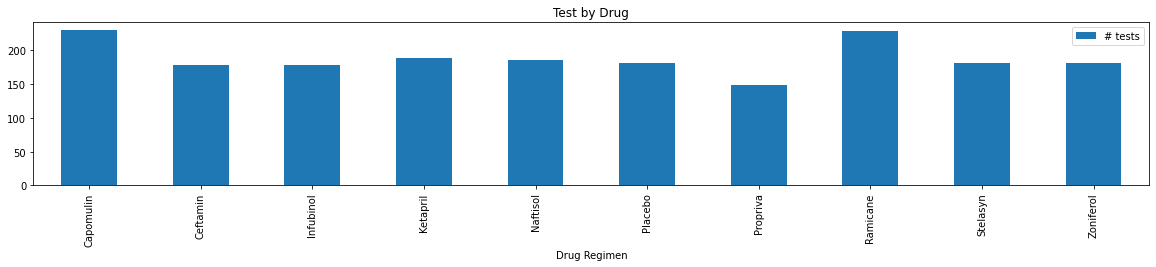

<Figure size 432x288 with 0 Axes>

In [256]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_chart.plot(kind="bar",figsize=(20,3))
plt.title("Test by Drug")
plt.show()
plt.tight_layout()

In [257]:
drug_chart

,# tests
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


In [258]:

drug_chart_index = drug_chart.reset_index()
drug_chart_index

,Drug Regimen,# tests
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


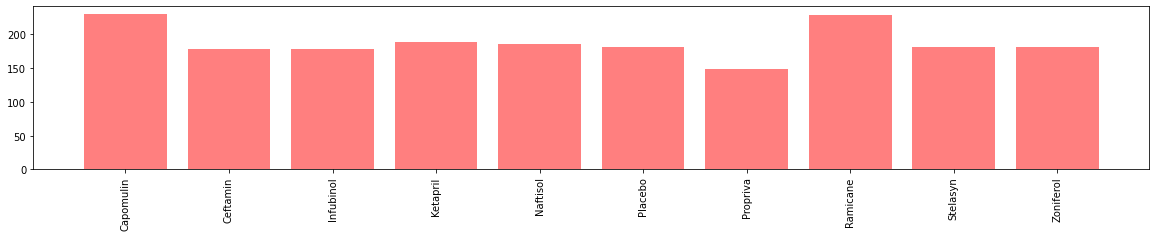

In [259]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(drug_chart_index))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, drug_chart_index["# tests"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, drug_chart_index["Drug Regimen"], rotation="vertical")
plt.show()

In [260]:
no_dups_mouse_df
mice_grouped = no_dups_mouse_df.groupby("Sex")
mice_count = mice_grouped["Mouse ID"].nunique()
mice_sex_df = pd.DataFrame({
    "mice #" : mice_count
})
micechartlabels = list(mice_sex_df.index.values)
mice_sex_df

,mice #
Sex,
Female,123
Male,125


<AxesSubplot:ylabel='mice #'>

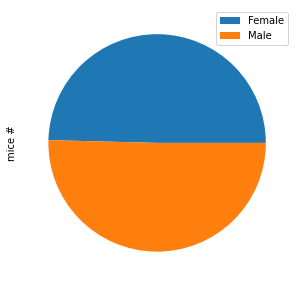

In [261]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex_df.plot(kind="pie",y="mice #", textprops={'color':"w"}, figsize=(5, 5))

([<matplotlib.patches.Wedge at 0x7fa033c7a370>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

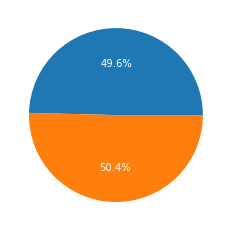

In [262]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mice_sex_df["mice #"],labels=micechartlabels,  autopct="%1.1f%%", textprops={'color':"w"})


## Quartiles, Outliers and Boxplots

In [263]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  groupby on mouseID, take the max on the timepoint column, 
# ...merge on mouse id and time point for drug volume

final_tp = no_dups_mouse_df.groupby("Mouse ID")["Timepoint"].max()
final_tp.reset_index()

final_tv = pd.merge(final_tp, no_dups_mouse_df, on=["Mouse ID","Timepoint"])
final_tv

# Capomulin, Ramicane, Infubinol, and Ceftamin
# drug_final_v = final_tv.groupby("Drug Regimen").sum()
# drug_final_v = drug_final_v.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
drug_final_v = final_tv[final_tv["Drug Regimen"].isin(["Capomulin","Ramicane", "Infubinol", "Ceftamin"])]
drug_final_v = drug_final_v[["Drug Regimen","Tumor Volume (mm3)"]]
drug_final_v


,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
3,Ceftamin,62.999356
6,Ramicane,38.407618
7,Ramicane,43.047543
...,...,...
238,Ceftamin,68.594745
239,Capomulin,31.896238
240,Ceftamin,64.729837
244,Ramicane,30.638696


In [264]:
treatments = drug_final_v["Drug Regimen"]
treatments

0      Infubinol
1      Infubinol
3       Ceftamin
6       Ramicane
7       Ramicane
         ...    
238     Ceftamin
239    Capomulin
240     Ceftamin
244     Ramicane
245    Infubinol
Name: Drug Regimen, Length: 100, dtype: object

In [265]:
volumes = drug_final_v["Tumor Volume (mm3)"]
volumes

0      67.973419
1      65.525743
3      62.999356
6      38.407618
7      43.047543
         ...    
238    68.594745
239    31.896238
240    64.729837
244    30.638696
245    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [266]:
quartiles = volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volumes is: {lowerq}")
print(f"The upper quartile of volumes is: {upperq}")
print(f"The interquartile range of volumes is: {iqr}")
print(f"The the median of volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of volumes is: 37.1877438025
The upper quartile of volumes is: 59.930261755
The interquartile range of volumes is: 22.742517952499995
The the median of volumes is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


In [267]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


#fig1, ax1 = plt.subplots()
#ax1.set_title('Drug Tests on Mice')
#ax1.set_ylabel('Volumes in mm3')
#ax1.boxplot(volumes)
plt.show()

In [268]:
drug_final_v["Drug Regimen"].unique()

array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)

<AxesSubplot:title={'center':'Tumor Volume (mm3)'}, xlabel='[Drug Regimen]'>

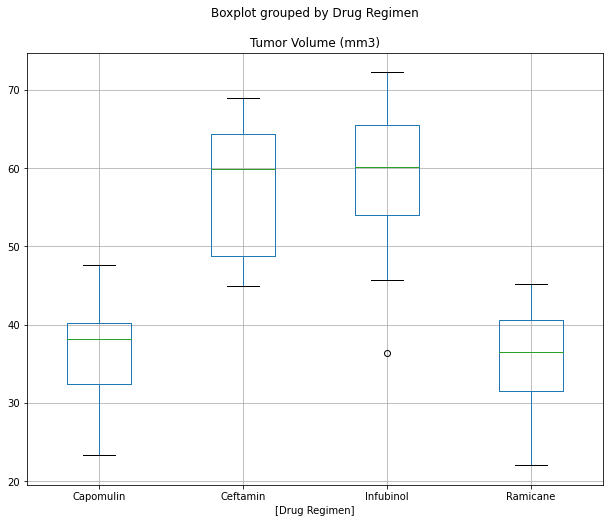

In [269]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drug_final_v.boxplot(by='Drug Regimen',figsize=(10,8))

## Line and Scatter Plots

In [270]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_df = no_dups_mouse_df[no_dups_mouse_df["Drug Regimen"].isin(["Capomulin"])]
mouse_df = mouse_df[["Mouse ID","Tumor Volume (mm3)","Timepoint","Weight (g)"]]
mouse_df

,Mouse ID,Tumor Volume (mm3),Timepoint,Weight (g)
0,b128,45.000000,0,22
1,b128,45.651331,5,22
2,b128,43.270852,10,22
3,b128,43.784893,15,22
4,b128,42.731552,20,22
...,...,...,...,...
1888,m601,33.118756,25,17
1889,m601,31.758275,30,17
1890,m601,30.834357,35,17
1891,m601,31.378045,40,17


In [271]:
mouse_df["Mouse ID"].unique()

array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

In [272]:
one_mouse_df = mouse_df[mouse_df["Mouse ID"].str.match('b128')]
one_mouse_df



,Mouse ID,Tumor Volume (mm3),Timepoint,Weight (g)
0,b128,45.000000,0,22
1,b128,45.651331,5,22
2,b128,43.270852,10,22
3,b128,43.784893,15,22
4,b128,42.731552,20,22
5,b128,43.262145,25,22
6,b128,40.605335,30,22
7,b128,37.967644,35,22
8,b128,38.379726,40,22
9,b128,38.982878,45,22


In [273]:
x = one_mouse_df["Tumor Volume (mm3)"]
y = one_mouse_df["Timepoint"]

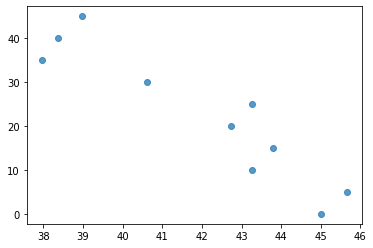

In [274]:
plt.scatter(x,y,marker='o',alpha=0.75)

In [275]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_group = mouse_df.groupby("Mouse ID")


In [276]:
avg_v = mouse_group["Tumor Volume (mm3)"].mean()
avg_v

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [277]:
avg_w = mouse_group["Weight (g)"].mean()

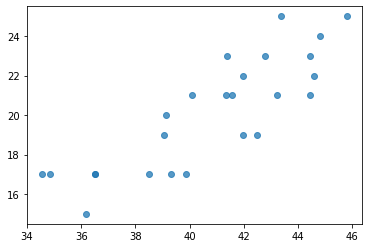

In [278]:
x = avg_v
y = avg_w
plt.scatter(x,y,marker='o',alpha=0.75)

## Correlation and Regression

In [279]:
mouse_group_df = pd.DataFrame({
    "avg Weights" : avg_w,
    "avg volume" : avg_v
    })
mouse_group_df

,avg Weights,avg volume
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


In [280]:
# Calculate the correlation coefficient
print(f"The correlation coefficient between weight and tumor volume is {round(st.pearsonr(avg_w,avg_v)[0],2)}")

The correlation coefficient between weight and tumor volume is 0.84


The r-squared is: 0.7088568047708723


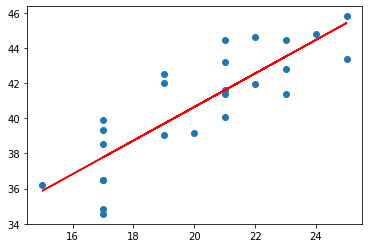

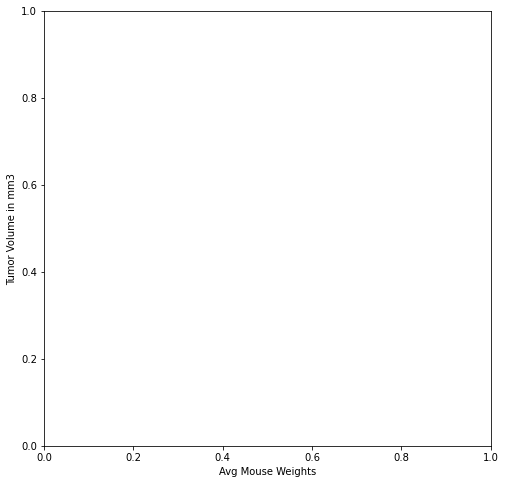

In [288]:
#and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#mouse_group_df["avg volume"] = mouse_group_df.target
x_values = avg_w
y_values = avg_v
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.figure(figsize=(8,8))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel('Avg Mouse Weights')
plt.ylabel('Tumor Volume in mm3')
print(f"The r-squared is: {rvalue**2}")
plt.show()
